In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
# code here
df = pd.read_csv('../data/bank-full.csv',sep=';')

Describe the dataset informations

In [4]:
# code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Use histogramms to display the features' distribution

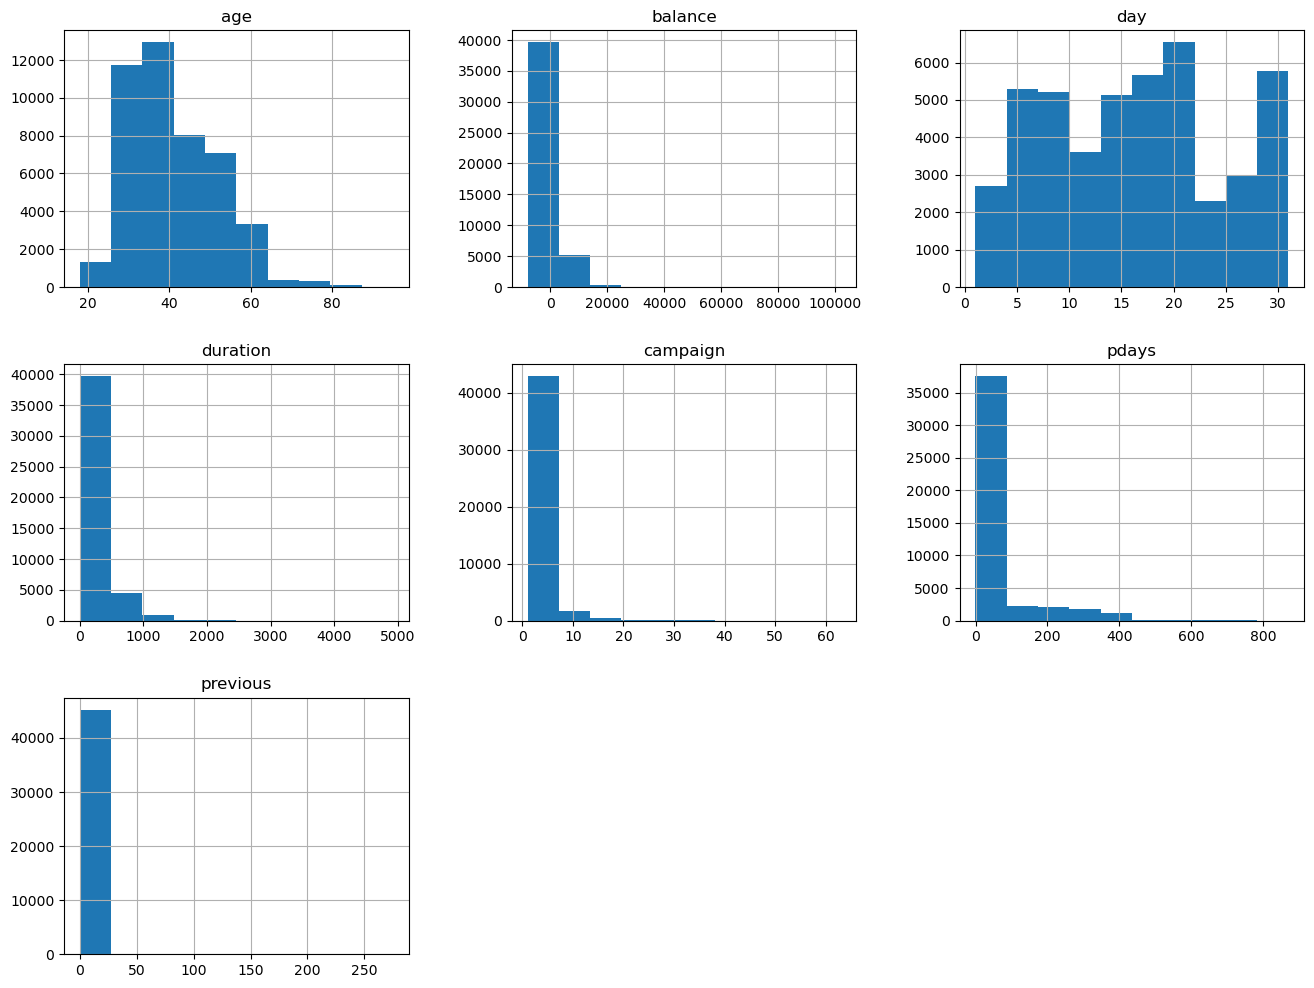

In [7]:
# code here
rcParams['figure.figsize'] = 16,12
plots = df.hist()

Use heatmap to display the numerical features' correlation

In [8]:
# code here

In [9]:
import seaborn as sns

In [10]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<Axes: >

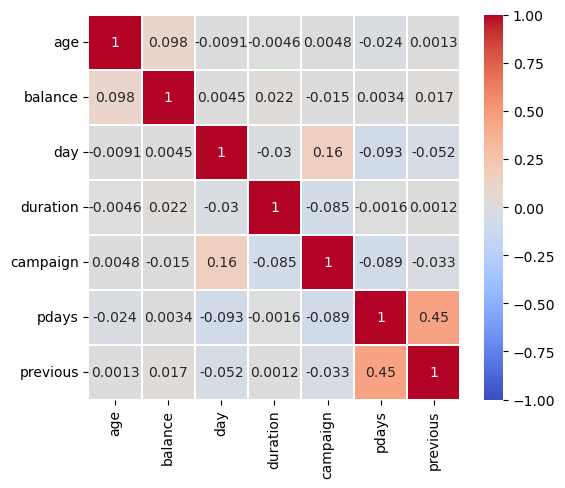

In [11]:
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_features].corr(),cmap='coolwarm',annot=True,linewidth=0.1,vmin=-1,vmax=1)

Text(0.5, 1.0, 'Count of each Target Class')

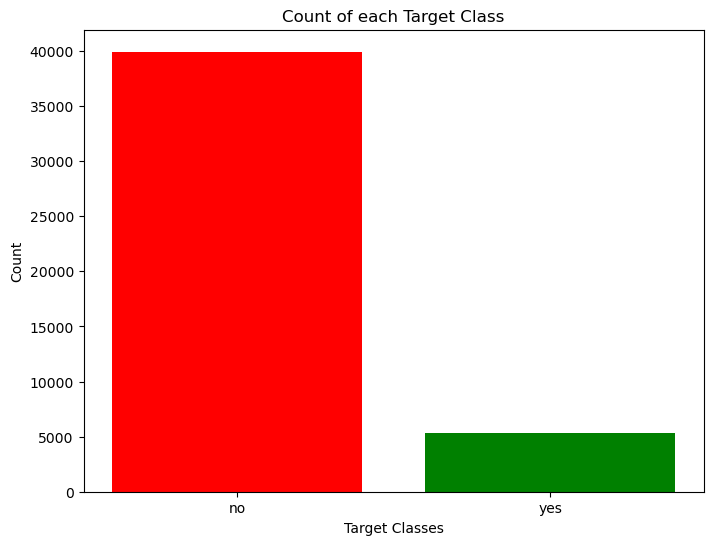

In [12]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['y'].unique(), df['y'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the propoer hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe is good, maybe is wrong. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [13]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [14]:
#code here
df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                               'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                               'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})

df['dayoftheyear'] = pd.to_datetime(df[['month', 'day']].assign(year=1984))
df['dayoftheyear'] = df['dayoftheyear'].dt.dayofyear

In [15]:
df = df.drop(['day','month'],axis =1)

We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. Now sort the features into categorical and numerical features

In [16]:
numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous','dayoftheyear'] # to be completed

In [17]:
numerical_features

['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear']

In [18]:
categorical_features = list(df.drop(numerical_features,axis=1).columns)
categorical_features.remove('y')
categorical_features.remove('education')
categorical_features.remove('duration')
categorical_features

['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [19]:
df_dumm = pd.get_dummies(df,columns = categorical_features,dtype=float)

In [20]:
df_dumm['y'] = df_dumm['y'].map({'no':0,'yes':1})
df_dumm.head()

,age,education,balance,duration,campaign,pdays,previous,y,dayoftheyear,job_admin.,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,2143,261,1,-1,0,0,126,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,secondary,29,151,1,-1,0,0,126,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,secondary,2,76,1,-1,0,0,126,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,unknown,1506,92,1,-1,0,0,126,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,unknown,1,198,1,-1,0,0,126,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
# Create the X and y DataFrames resample the dataframes if necessary
X = df_dumm
y = df_dumm.pop('y')
# train_test split
# X_train, X_test, y_train, y_test = None

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, 
                                                    test_size = 0.3,
                                                    stratify=y)

In [23]:
# import and create the appropriate transformers 

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [24]:
# code here
print(f'shape X: {X.shape}')
print(f'shape y: {y.shape}')

shape X: (45211, 36)
shape y: (45211,)


Well done! The data is now ready to be splitted into sets and used to train models!

Hop hop hop!!! Not to fast!! You processed the data for machine learning, but are all the data useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

<Axes: xlabel='duration'>

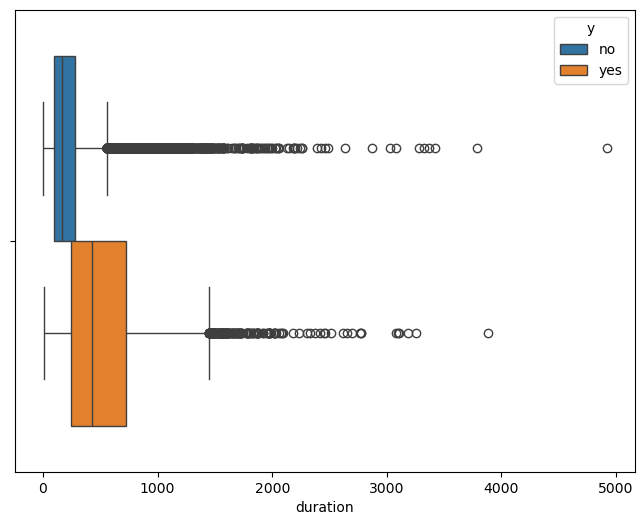

In [25]:
sns.boxplot(df, x='duration', hue='y')

<Axes: xlabel='duration', ylabel='Count'>

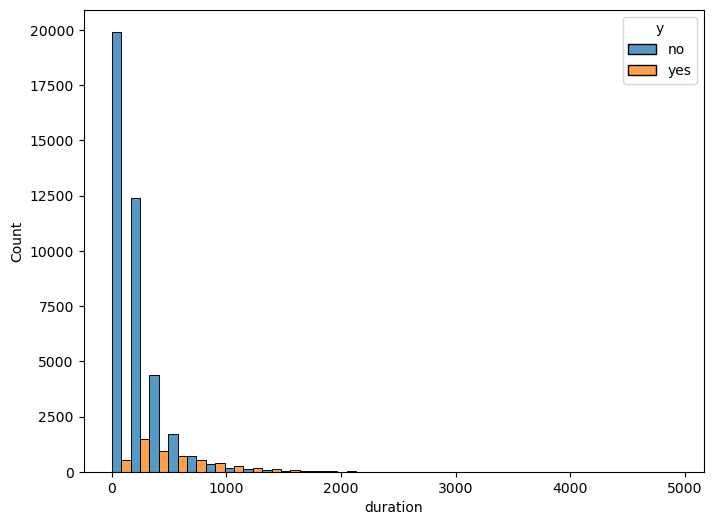

In [26]:
sns.histplot(df,x='duration',bins=30,hue='y',multiple='dodge')

#### answer 1:
The duration is a consequence rather than a cause of a successful outcome. this variable could confuse the model, leading to an incorrect understanding of what drives a positive outcome.
predict whether a customer will subscribe to a product before contacting them!
outliers !

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [27]:
# remove duration column
df_dumm = df_dumm.drop('duration',axis=1)

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### creation of a pipeline

In [28]:
df['y'] = df['y'].map({'no':0,'yes':1})
df = df.drop('duration',axis=1)

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,0,126
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,0,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,0,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,0,126
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,0,126


In [30]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encode', OneHotEncoder(handle_unknown='ignore',sparse_output=True))
    ])
ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ord_1', OrdinalEncoder(categories=[['unknown','primary','secondary','tertiary']])),
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('ord', ord_pipeline, ['education'])
    ])

In [32]:
X = df
y = df.pop('y')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, 
                                                    test_size = 0.3,
                                                    stratify=y)

X_train_pip = full_pipeline.fit_transform(X_train)
X_test_pip = full_pipeline.transform(X_test)

In [34]:
print(X_train_pip.shape)
print(X_test_pip.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 35)
(13564, 35)
(31647,)
(13564,)


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [35]:
# Decision tree model creation and tree visualization

#### 1# tree

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

pipeline_Tree = Pipeline([
        ("prep", full_pipeline),
        ('tree', DecisionTreeClassifier(max_depth=3))
    ])

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 101, 
                                                    test_size = 0.3,
                                                    stratify=y)

X_train_pip2 = full_pipeline.fit_transform(X_train2)
X_test_pip2 = full_pipeline.transform(X_test2)

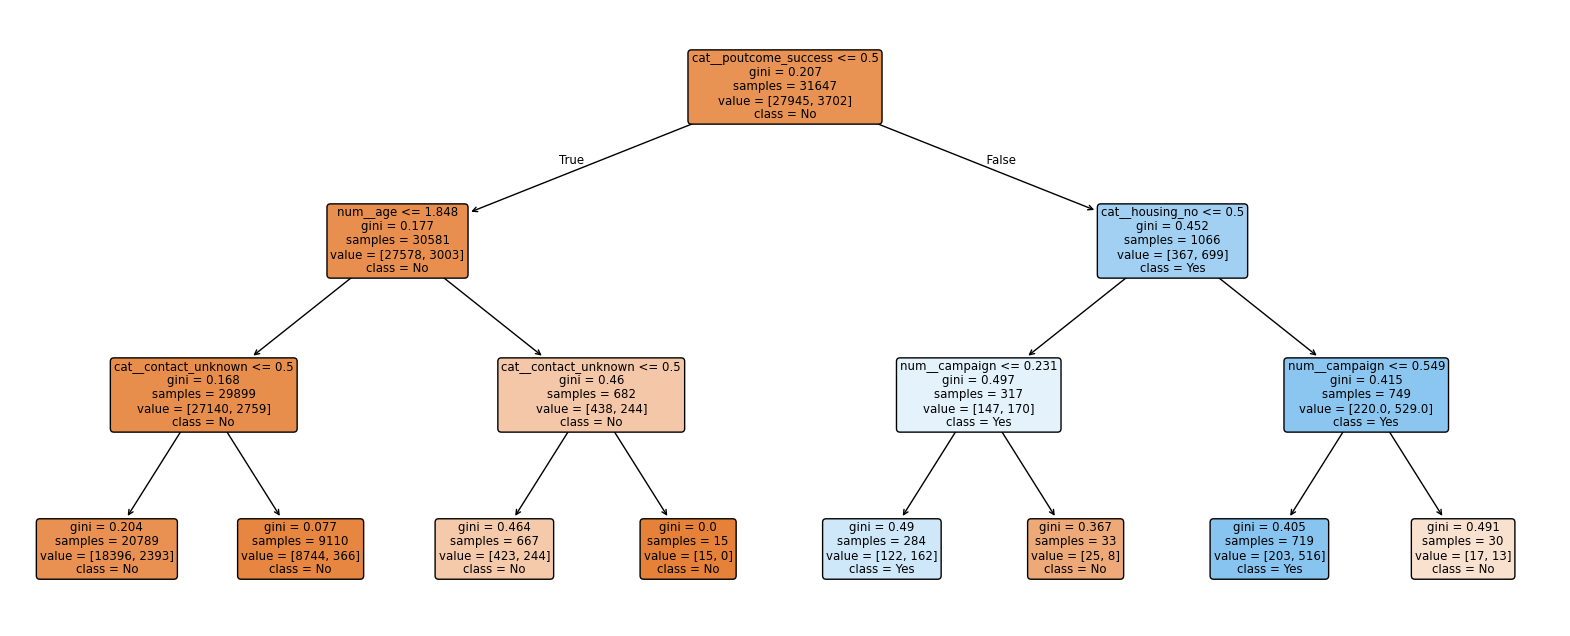

In [38]:
pipeline_Tree.fit(X_train, y_train)

y_pred = pipeline_Tree.predict(X_test)
y_pred_train = pipeline_Tree.predict(X_train)

plt.figure(figsize=(20,8))
tree.plot_tree(pipeline_Tree.named_steps['tree'],feature_names=full_pipeline.get_feature_names_out(),class_names = ['No','Yes'],filled=True,rounded=True)
plt.show()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,  precision_score, recall_score, accuracy_score, f1_score

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.63      0.17      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [41]:
from sklearn.metrics import average_precision_score
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

Av. Precision: 0.203


In [42]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,11823,154
1,1323,264


In [43]:
print(precision_score(y_test,y_pred))

0.631578947368421


Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

#### 2# tree

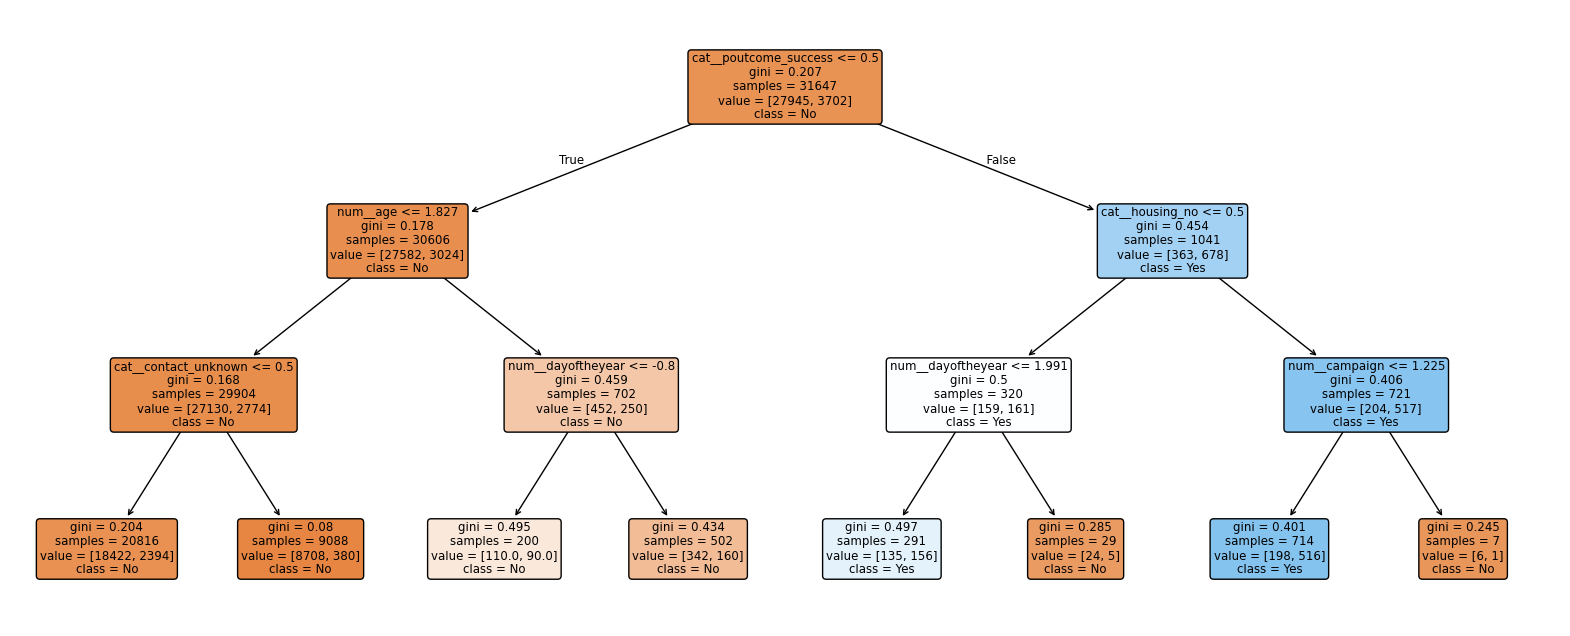

In [44]:
# create a new train and test dataset with a different seed
pipeline_Tree.fit(X_train2, y_train2)

y_pred2 = pipeline_Tree.predict(X_test2)
y_pred_train2 = pipeline_Tree.predict(X_train2)

plt.figure(figsize=(20,8))
tree.plot_tree(pipeline_Tree.named_steps['tree'],feature_names=full_pipeline.get_feature_names_out(),class_names = ['No','Yes'],filled=True,rounded=True)
plt.show()

In [45]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.64      0.18      0.29      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [46]:
pd.DataFrame(confusion_matrix(y_test2,y_pred2))

,0,1
0,11813,164
1,1294,293


In [47]:
print(precision_score(y_test2,y_pred2))

0.6411378555798687


In [48]:
# Second tree creation

What can you tell about the two trees?

<span style='color:green'> The class labeled "0" has significantly more samples (11,977) than the class labeled "1" (1,587) </span>

<span style='color:green'> both give bad (but different) prediction on positive decisions (f1 close to or above 0.90)
with similar accuracy (0.89 in the first and 0.86 in the second), but this is misleading due to the class imbalance

<span style='color:green'> in First report the model shows some capability to identify the minority class, with a precision of 0.63, recall of 0.17, and F1-score of 0.26. These values are not great but indicate the model is making some correct predictions for class "1."

<span style='color:green'> The macro average values, which treat both classes equally, are significantly lower in the second report (especially in recall and F1-score). This drop reflects the model's poor performance on the minority class in that particular data split.

<span style='color:green'> The weighted average, which accounts for the number of instances in each class, is slightly better in the first report. However, it also shows a decline in the second report due to the model's struggles with class "1". 

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

scoring = {
    'average_precision': 'average_precision',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'balanced_accuracy': 'balanced_accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted'
}

cv = cross_validate(pipeline_Tree.named_steps['tree'],
                    X_train_pip,
                    y_train,
                    cv=StratifiedKFold(n_splits=5),
                    scoring=scoring, 
                    return_train_score=True, 
                    n_jobs=-1)

cv2 = cross_validate(pipeline_Tree.named_steps['tree'],
                    X_train_pip2,
                    y_train2,
                    cv=StratifiedKFold(n_splits=5),
                    scoring=scoring, 
                    return_train_score=True, 
                    n_jobs=-1)

In [50]:
pd.DataFrame(cv).transpose()

,0,1,2,3,4
fit_time,0.085446,0.084942,0.083218,0.086535,0.086631
score_time,0.132386,0.131553,0.131468,0.132222,0.131757
test_average_precision,0.262537,0.285846,0.286874,0.274035,0.267469
train_average_precision,0.284530,0.275165,0.278096,0.278137,0.278753
test_accuracy,0.891943,0.893523,0.894928,0.893506,0.891610
train_accuracy,0.894419,0.893352,0.893317,0.893712,0.894699
test_precision,0.649215,0.693642,0.686567,0.650000,0.640625
train_precision,0.682278,0.724613,0.656287,0.661888,0.683623
test_recall,0.167341,0.161943,0.186486,0.193243,0.166216
train_recall,0.182033,0.142182,0.185010,0.187036,0.186023


In [51]:
# pd.DataFrame(cv2).transpose()

In [52]:
# Cross validation on Decision trees
pd.DataFrame(cv).describe().transpose().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
train_accuracy,5.0,0.893900,0.000629,0.893317,0.893352,0.893712,0.894419,0.894699
train_recall_weighted,5.0,0.893900,0.000629,0.893317,0.893352,0.893712,0.894419,0.894699
test_recall_weighted,5.0,0.893102,0.001346,0.891610,0.891943,0.893506,0.893523,0.894928
test_accuracy,5.0,0.893102,0.001346,0.891610,0.891943,0.893506,0.893523,0.894928
train_precision_weighted,5.0,0.875041,0.001826,0.872725,0.873589,0.875641,0.876134,0.877117
test_precision_weighted,5.0,0.872772,0.003139,0.869198,0.870197,0.872779,0.875083,0.876601
train_f1_weighted,5.0,0.865155,0.002790,0.860217,0.865859,0.866309,0.866397,0.866996
test_f1_weighted,5.0,0.864433,0.002487,0.862277,0.862593,0.863013,0.867031,0.867253
train_precision_macro,5.0,0.791194,0.012597,0.778844,0.781763,0.791765,0.792631,0.810964
test_precision_macro,5.0,0.782218,0.012151,0.770044,0.774355,0.776138,0.794165,0.796390


In [53]:
# Cross validation on Decision trees
# pd.DataFrame(cv2).describe().transpose().sort_values('mean',ascending=False)

Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Plot your metrics performance

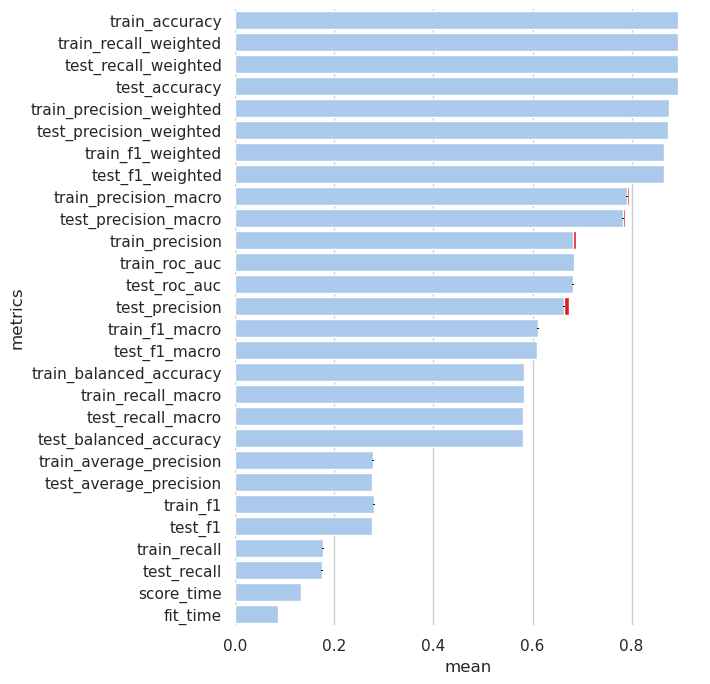

In [54]:
# performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes("pastel")
sns.barplot(pd.DataFrame(cv2).describe().transpose().sort_values('mean',ascending=False), 
            y=pd.DataFrame(cv2).describe().transpose().sort_values('mean',ascending=False).index, 
            x =pd.DataFrame(cv2).describe().transpose().sort_values('mean',ascending=False)['mean'], 
            # yerr =pd.DataFrame(cv2).describe().transpose().sort_values('mean',ascending=False)['std'],
            color="red"
           )
sns.barplot(pd.DataFrame(cv).describe().transpose().sort_values('mean',ascending=False), 
            y=pd.DataFrame(cv).describe().transpose().sort_values('mean',ascending=False).index, 
            x =pd.DataFrame(cv).describe().transpose().sort_values('mean',ascending=False)['mean'], 
            yerr =pd.DataFrame(cv).describe().transpose().sort_values('mean',ascending=False)['std'].to_list(),
            color="b"
           )
# plt.xticks(rotation=45)
plt.ylabel('metrics')
sns.despine(left=True, bottom=True)
plt.show()

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [55]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1,3,5,10,15]
}

grid_search = GridSearchCV(pipeline_Tree.named_steps['tree'], 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)

In [56]:
grid_search.fit(X_train_pip, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 15]},
             return_train_score=True, scoring='average_precision')

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [57]:
# Test metrics
from sklearn.metrics import average_precision_score
best = grid_search.best_estimator_
y_pred = best.predict(X_test_pip)
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.58      0.21      0.31      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Av. Precision: 0.213


What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [58]:
# train_test split (you can copy paste the previously declared cell)
# X_train, X_test, y_train, y_test = None

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3,
                                                    stratify=y)

X_train_pip = full_pipeline.fit_transform(X_train)
X_test_pip = full_pipeline.transform(X_test)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [59]:
# gridsearch for the Random Forest classifier
#
from sklearn.ensemble import RandomForestClassifier

pipeline_Forest = Pipeline([
        ("prep", full_pipeline),
        ('forest', RandomForestClassifier(random_state=42))
    ])

param_grid = {
    'n_estimators': [3,10,100,200],
    'max_depth': [3,5,10,15,20]
}

grid_search = GridSearchCV(pipeline_Forest.named_steps['forest'], 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1
                          )

In [60]:
grid_search.fit(X_train_pip, y_train)
best = grid_search.best_estimator_
best

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [61]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070472,0.005702,0.008601,0.000165,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.306371,0.319727,0.304786,...,0.313391,0.006449,19,0.309213,0.314362,0.320919,0.329728,0.327730,0.320390,0.007780
1,0.202696,0.045924,0.013552,0.004747,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.339143,0.357346,0.343839,...,0.348543,0.007364,16,0.356642,0.354869,0.351099,0.354085,0.355979,0.354535,0.001931
2,1.657509,0.106937,0.051278,0.000347,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.356199,0.375879,0.367152,...,0.365836,0.009140,14,0.378346,0.371553,0.368353,0.373292,0.374847,0.373278,0.003328
3,3.197819,0.070065,0.105624,0.016285,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.359454,0.379853,0.371947,...,0.369761,0.008894,12,0.380582,0.375684,0.373574,0.378149,0.378516,0.377301,0.002428
4,0.073126,0.004796,0.009166,0.000581,5,3,"{'max_depth': 5, 'n_estimators': 3}",0.349379,0.361571,0.335091,...,0.340814,0.014383,17,0.370033,0.352540,0.355127,0.345947,0.347065,0.354142,0.008641


/tmp/ipykernel_45190/1253902816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pd.DataFrame(grid_search.cv_results_),
/tmp/ipykernel_45190/1253902816.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pd.DataFrame(grid_search.cv_results_),


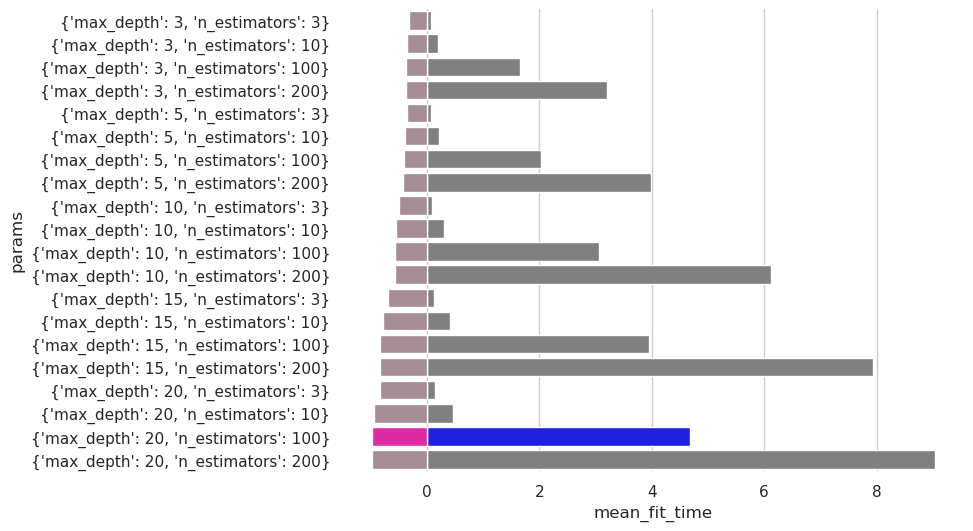

In [62]:
sns.barplot(pd.DataFrame(grid_search.cv_results_), 
            y = pd.DataFrame(grid_search.cv_results_)['params'].apply(lambda x: str(x)), 
            x = 'mean_fit_time',
            # label='Mean Fit Time',
            palette=[
            'blue' if str(params) == "{'max_depth': 20, 'n_estimators': 100}" else 'grey' 
            for params in pd.DataFrame(grid_search.cv_results_)['params']
            ],
            # color='grey'
           )
sns.barplot(pd.DataFrame(grid_search.cv_results_), 
            y = pd.DataFrame(grid_search.cv_results_)['params'].apply(lambda x: str(x)), 
            x = -pd.DataFrame(grid_search.cv_results_)['mean_train_score'],
            # label='Mean Train Score',
            palette=[
            '#FA0FAC' if str(params) == "{'max_depth': 20, 'n_estimators': 100}" else '#AA8894' 
            for params in pd.DataFrame(grid_search.cv_results_)['params']
            ],
            # color='#AA8894'
           )
sns.despine(left=True, bottom=True)

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

10 ?

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [63]:
# Test metrics
best = RandomForestClassifier(max_depth = 20, n_estimators = 100)
best.fit(X_train_pip,y_train)
y_pred = best.predict(X_test_pip)
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.67      0.20      0.30      1587

    accuracy                           0.89     13564
   macro avg       0.79      0.59      0.62     13564
weighted avg       0.88      0.89      0.87     13564

Av. Precision: 0.226


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [64]:
# training and display features' importance.
# tell them to use the RandomForest Object

In [65]:
featurenames = full_pipeline.get_feature_names_out()
feature_importances = pd.DataFrame(best.feature_importances_)
feature_importances['feature_name'] = pd.DataFrame(featurenames)
feature_importances.sort_values(by = 0, ascending=False).head(15)

,0,feature_name
5,0.190818,num__dayoftheyear
1,0.168845,num__balance
0,0.150270,num__age
3,0.065548,num__pdays
2,0.062157,num__campaign
32,0.057579,cat__poutcome_success
34,0.037752,ord__education
4,0.034858,num__previous
23,0.018610,cat__housing_no
24,0.015967,cat__housing_yes


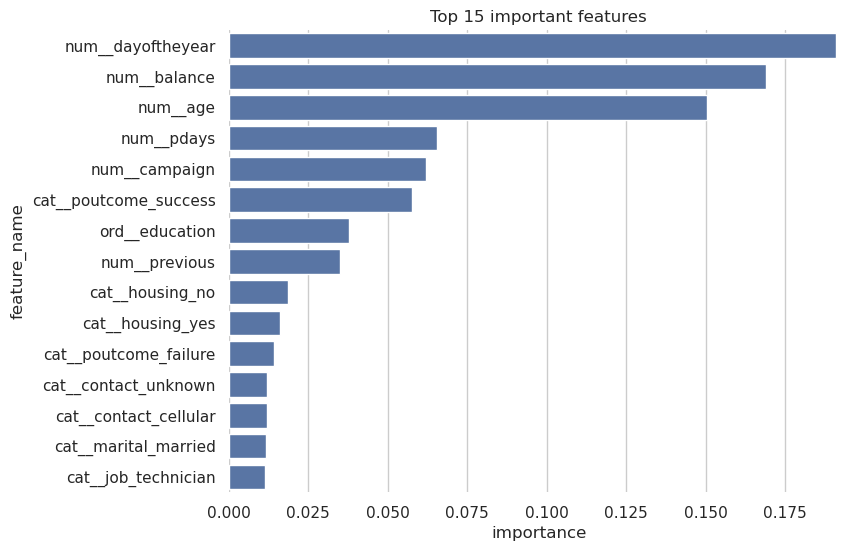

In [66]:
sns.barplot(feature_importances.sort_values(by = 0, ascending=False).head(15), 
            y = feature_importances.sort_values(by = 0, ascending=False).head(15)['feature_name'], 
            x = feature_importances.sort_values(by = 0, ascending=False).head(15)[0],
            # label='Mean Fit Time',
            # palette=[
            # 'blue' if str(params) == "{'max_depth': 20, 'n_estimators': 100}" else 'grey' 
            # for params in pd.DataFrame(grid_search.cv_results_)['params']
            # ],
            # color='grey'
           )
plt.xlim(0,0.195)
plt.xlabel('importance')
plt.title('Top 15 important features')
sns.despine(left=True, bottom=True)

What is the most important feature?

day of the year

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [67]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features

In [68]:
from sklearn.feature_selection import RFECV

min_features_to_select = 1

rfecv = RFECV(
    best,
    step=3,
    cv=StratifiedKFold(5),
    scoring='average_precision',
    min_features_to_select=min_features_to_select,
    n_jobs=-1
)
rfecv.fit(X_train_pip, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(max_depth=20), n_jobs=-1,
      scoring='average_precision', step=3)

In [69]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 35


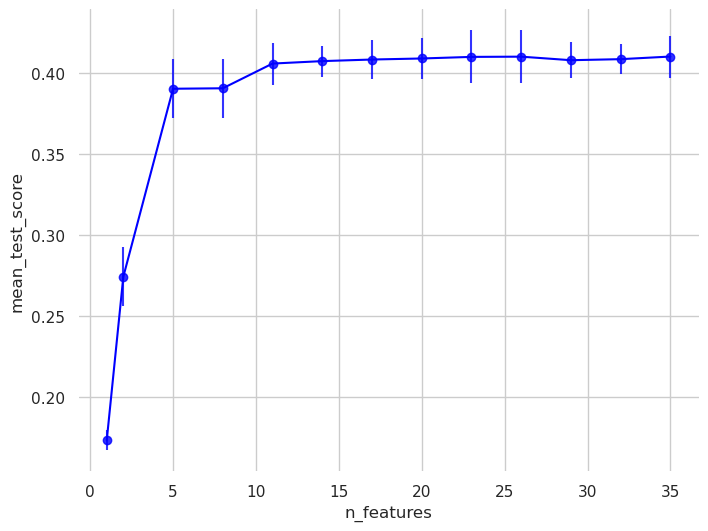

In [70]:
ax = sns.lineplot(pd.DataFrame(rfecv.cv_results_),
             x = pd.DataFrame(rfecv.cv_results_)["n_features"], 
             y=pd.DataFrame(rfecv.cv_results_)["mean_test_score"], 
             color = 'blue' 
             )
ax.errorbar(x = pd.DataFrame(rfecv.cv_results_)["n_features"],
            y = pd.DataFrame(rfecv.cv_results_)["mean_test_score"], 
            yerr=pd.DataFrame(rfecv.cv_results_)["std_test_score"], fmt='o', color='blue', alpha=0.8)

sns.despine(left=True, bottom=True)

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [71]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [72]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [73]:
# model building and evaluation
pipeline_Boost = Pipeline([
        ("prep", full_pipeline),
        ('boost', xgb.XGBClassifier())
])

In [74]:
param_grid = {
    'max_depth': [2,4,8,10,20,None],
    'n_estimators': [3,5,10,100],
    # 'learning_rate': [0.1,0.3,1,10],
    # 'subsample': [1,2,5]
}

grid_search = GridSearchCV(pipeline_Boost.named_steps['boost'], 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)

In [75]:
grid_search.fit(X_train_pip, y_train)
best = grid_search.best_estimator_
best

Fitting 5 folds for each of 24 candidates, totalling 120 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

/tmp/ipykernel_45190/2474980588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pd.DataFrame(grid_search.cv_results_),
/tmp/ipykernel_45190/2474980588.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pd.DataFrame(grid_search.cv_results_),


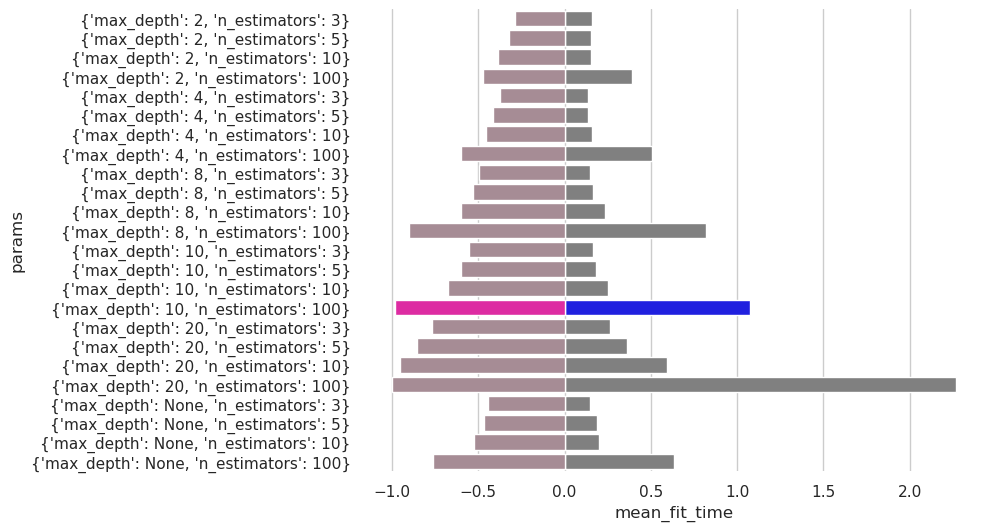

In [76]:
sns.barplot(pd.DataFrame(grid_search.cv_results_), 
            y = pd.DataFrame(grid_search.cv_results_)['params'].apply(lambda x: str(x)), 
            x = 'mean_fit_time',
            # label='Mean Fit Time',
            palette=[
            'blue' if str(params) == "{'max_depth': 10, 'n_estimators': 100}" else 'grey' 
            for params in pd.DataFrame(grid_search.cv_results_)['params']
            ],
            # color='grey'
           )
sns.barplot(pd.DataFrame(grid_search.cv_results_), 
            y = pd.DataFrame(grid_search.cv_results_)['params'].apply(lambda x: str(x)), 
            x = -pd.DataFrame(grid_search.cv_results_)['mean_train_score'],
            # label='Mean Train Score',
            palette=[
            '#FA0FAC' if str(params) == "{'max_depth': 10, 'n_estimators': 100}" else '#AA8894' 
            for params in pd.DataFrame(grid_search.cv_results_)['params']
            ],
            # color='#AA8894'
           )
sns.despine(left=True, bottom=True)

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [77]:
# Test metrics
best.fit(X_train_pip,y_train)
y_pred = best.predict(X_test_pip)

In [78]:
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.66      0.22      0.33      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.60      0.64     13564
weighted avg       0.88      0.90      0.87     13564

Av. Precision: 0.238


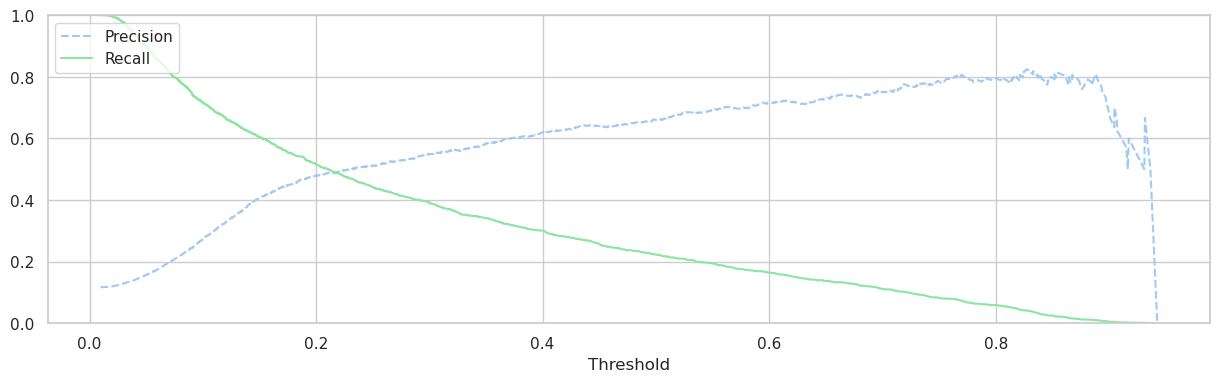

In [79]:
# performance curves
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(15,4))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

y_proba = best.predict_proba(X_test_pip)
y_scores = y_proba[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

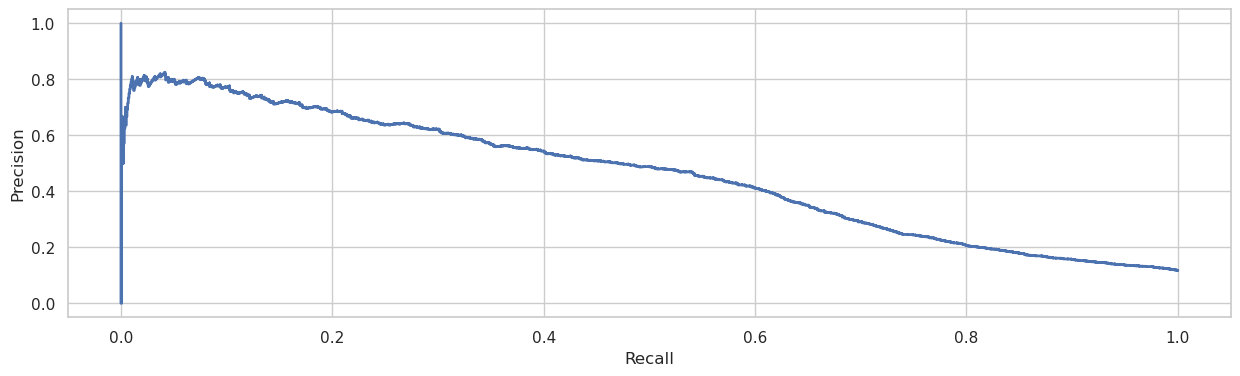

In [80]:
def plot_precision_recall_curve(precisions, recalls):
    plt.figure(figsize=(15,4))
    plt.step(recalls, precisions, linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
#TOFILL
plot_precision_recall_curve(precisions, recalls)

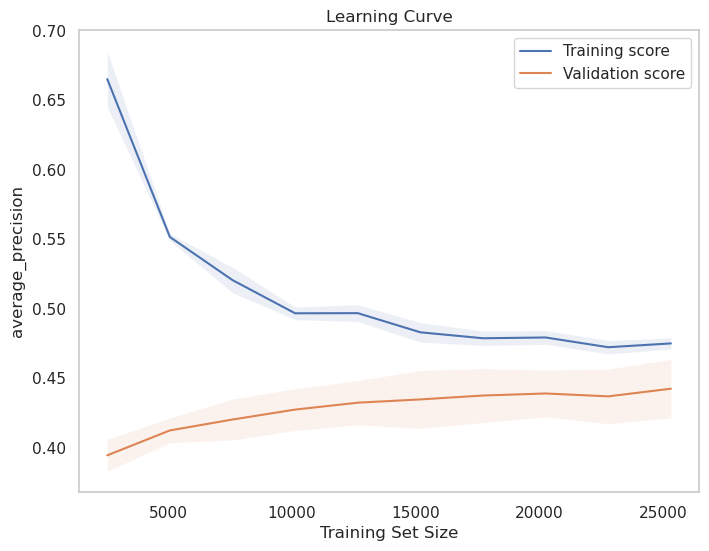

In [81]:
from sklearn.model_selection import learning_curve

import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(best, 
                                                              X_train_pip, 
                                                              y_train, 
                                                              cv=5, 
                                                              scoring='average_precision', 
                                                              train_sizes=np.linspace(0.1, 1.0, 10), 
                                                              n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, validation_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('average_precision')
plt.legend(loc='best')
plt.grid()
plt.show()

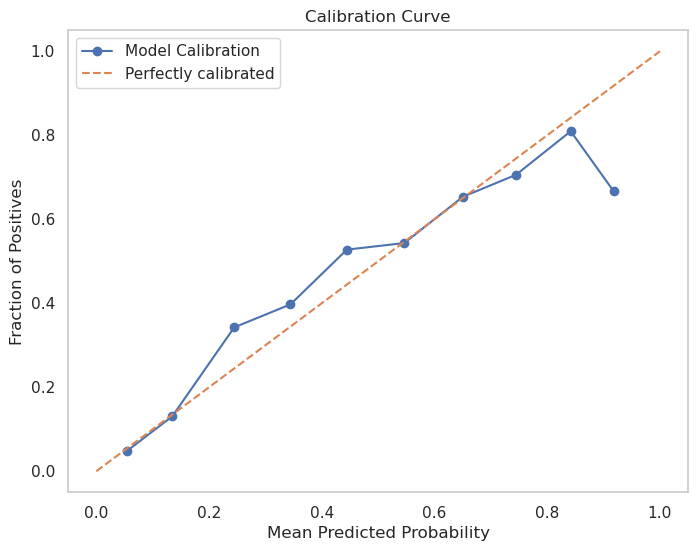

In [82]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_scores, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Model Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='best')
plt.grid()
plt.show()

## Let's Conclude

Report your test set metrics for the three methods here

In [89]:
# Decision Tree on test set
print('Av. Precision (Tree): 0.213')

Av. Precision (Tree): 0.213


In [90]:
# Random forest on test set
print('Av. Precision (Forest): 0.226')

Av. Precision (Forest): 0.226


In [92]:
# XGBoost on test set
print('Av. Precision (Boost): 0.238')

Av. Precision (Boost): 0.238


What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [86]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [87]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [96]:
# code here
param_grid = {
    'max_depth': [1,2,3,5,10,15],
    'n_estimators': [3,5,10,100]
}
grid_search = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)

In [97]:
grid_search.fit(X_train_pip, y_train)
best = grid_search.best_estimator_
best

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [98]:
y_pred = best.predict(X_test_pip)

In [99]:
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     11977
           1       0.29      0.59      0.39      1587

    accuracy                           0.78     13564
   macro avg       0.61      0.70      0.63     13564
weighted avg       0.86      0.78      0.81     13564

Av. Precision: 0.221


In [103]:
param_grid = {
    'max_depth': [1,2,3,5,10,15,20,30]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced',n_estimators=100,max_features=20), 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)

grid_search.fit(X_train_pip, y_train)
best = grid_search.best_estimator_
best

y_pred = best.predict(X_test_pip)
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     11977
           1       0.41      0.56      0.47      1587

    accuracy                           0.85     13564
   macro avg       0.67      0.73      0.69     13564
weighted avg       0.88      0.85      0.86     13564

Av. Precision: 0.282


In [111]:
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]


param_grid = {
    'max_depth': [3,5,10,15,20],
    'n_estimators': [10,100],
    'colsample_bytree' : [0.5,0.6,0.8]
}
grid_search = GridSearchCV(xgb.XGBClassifier(scale_pos_weight=ratio, colsample_bytree = 20), 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)

grid_search.fit(X_train_pip, y_train)
best = grid_search.best_estimator_


y_pred = best.predict(X_test_pip)
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     11977
           1       0.34      0.66      0.45      1587

    accuracy                           0.81     13564
   macro avg       0.64      0.74      0.67     13564
weighted avg       0.88      0.81      0.83     13564

Av. Precision: 0.263


In [108]:
best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

In [115]:
X_over, y_over = oversample.fit_resample(X_train_pip, y_train)

In [117]:
param_grid = {
    'max_depth': [1,2,3,5,10,15,20,30]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced',n_estimators=100,max_features=20), 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)

grid_search.fit(X_over, y_over)
best = grid_search.best_estimator_
best

y_pred = best.predict(X_test_pip)
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.52      0.35      0.42      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.65      0.68     13564
weighted avg       0.87      0.89      0.88     13564

Av. Precision: 0.260


In [118]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = oversample.fit_resample(X_train_pip, y_train)

In [119]:
param_grid = {
    'max_depth': [10,15,20,30]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced',n_estimators=100,max_features=20), 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)

grid_search.fit(X_under, y_under)
best = grid_search.best_estimator_
best

y_pred = best.predict(X_test_pip)
print(classification_report(y_test,y_pred))
print(f'Av. Precision: {average_precision_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.51      0.35      0.42      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.65      0.68     13564
weighted avg       0.87      0.89      0.88     13564

Av. Precision: 0.256
